# DATA 4319 (Statistical & Machine Learning)
## Lecture 1. The Perceptron Learning Model

In this notebook we will implement the perceptron learning model in order to classify data from the [iris data set](https://en.wikipedia.org/wiki/Iris_flower_data_set). Our task is to predict the species of flower based off of measurements of sepeal length and width. This task is often referred to as the ''Hello World'' of machine learning .  

You will need to add the following packages:
- CSV [(documentation)](https://juliadata.github.io/CSV.jl/stable/)
- Plots [(documentation)](http://docs.juliaplots.org/latest/) 



In [2]:
using CSV
""" Provided you have a saved and valid .csv file in your current working directory, you may 
    load this file as a Dataframe using the following syntax. 
"""
iris = CSV.read("iris_data.csv")
iris = iris[1:100,1:5]

┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1192


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64⍰,Float64⍰,Float64⍰,Float64⍰,String⍰
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [3]:
# We will only use the sepal length and width for our analysis 
data = [x for x in zip(iris[1], iris[2], iris[5])]

100-element Array{Tuple{Float64,Float64,String},1}:
 (5.1, 3.5, "setosa")    
 (4.9, 3.0, "setosa")    
 (4.7, 3.2, "setosa")    
 (4.6, 3.1, "setosa")    
 (5.0, 3.6, "setosa")    
 (5.4, 3.9, "setosa")    
 (4.6, 3.4, "setosa")    
 (5.0, 3.4, "setosa")    
 (4.4, 2.9, "setosa")    
 (4.9, 3.1, "setosa")    
 (5.4, 3.7, "setosa")    
 (4.8, 3.4, "setosa")    
 (4.8, 3.0, "setosa")    
 ⋮                       
 (5.6, 3.0, "versicolor")
 (5.5, 2.5, "versicolor")
 (5.5, 2.6, "versicolor")
 (6.1, 3.0, "versicolor")
 (5.8, 2.6, "versicolor")
 (5.0, 2.3, "versicolor")
 (5.6, 2.7, "versicolor")
 (5.7, 3.0, "versicolor")
 (5.7, 2.9, "versicolor")
 (6.2, 2.9, "versicolor")
 (5.1, 2.5, "versicolor")
 (5.7, 2.8, "versicolor")

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1192


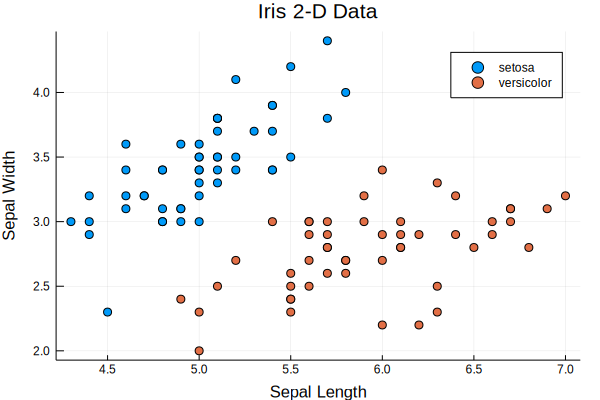

In [5]:
using Plots
scatter([x[1:2] for x in data if x[3] == "setosa"], label = "setosa")
scatter!([x[1:2] for x in data if x[3] != "setosa"], label = "versicolor")
plot!(title = "Iris 2-D Data", xlabel = "Sepal Length", ylabel = "Sepal Width")                      

In [6]:
# Assign X: input data
# Assign Y: known values 
X, Y = [[x[1], x[2]] for x in data], [x[3] == "setosa" ? 1 : -1 for x in data]

(Array{Float64,1}[[5.1, 3.5], [4.9, 3.0], [4.7, 3.2], [4.6, 3.1], [5.0, 3.6], [5.4, 3.9], [4.6, 3.4], [5.0, 3.4], [4.4, 2.9], [4.9, 3.1]  …  [5.5, 2.6], [6.1, 3.0], [5.8, 2.6], [5.0, 2.3], [5.6, 2.7], [5.7, 3.0], [5.7, 2.9], [6.2, 2.9], [5.1, 2.5], [5.7, 2.8]], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [7]:
# Assign random weights
w = rand(3)

# Perceptron Hypothesis Function 
function h(w, x)
    x_new = [1.0, x[1], x[2]]
    return w'x_new > 0 ? 1 : -1
end

h (generic function with 1 method)

In [8]:
# Perceptron Learning Algorithm 
function PLA(w, x, y)
    if h(w, x) != y
        w += y*[1.0, x[1], x[2]]
    end
    return w
end

PLA (generic function with 1 method)

In [9]:
# Iterate the PLA 20 times 
for i = 1:1000
    # Choose random entries to update (if possible )
    j = rand(1:100)
    w = PLA(w, X[j], Y[j])
end

In [10]:
# Check errors
temp_error = 0
for i = 1:100
    if abs(h(w, X[i]) - Y[i]) != 0
        temp_error += 1
    end
end
println("After 1000 terations, we have $temp_error number of errors")


After 1000 terations, we have 6 number of errors
